<a href="https://colab.research.google.com/github/magaramol/Logistic-Regression-Implementation/blob/main/linear_regression_hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Predict housing prices for the test data
y_pred = model.predict(X_test)


In [6]:
# Calculate the Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.5558915986952422
R-squared Score: 0.5757877060324524


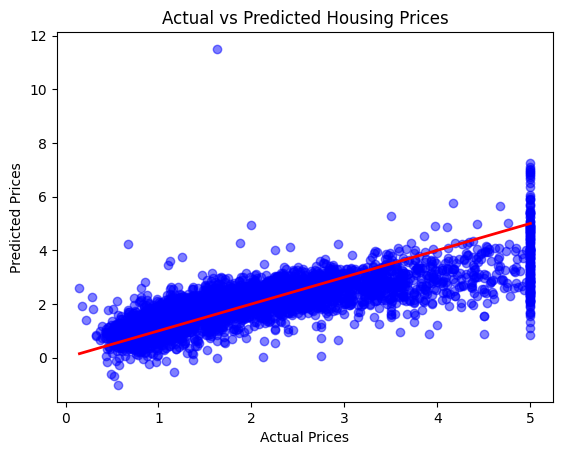

In [7]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()


In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [9]:
# Define parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


In [10]:
# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()


In [11]:
# Perform Grid Search for Ridge
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Perform Grid Search for Lasso
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [12]:
# Ridge results
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best R² score for Ridge:", ridge_grid.best_score_)

# Lasso results
print("Best parameters for Lasso:", lasso_grid.best_params_)
print("Best R² score for Lasso:", lasso_grid.best_score_)


Best parameters for Ridge: {'alpha': 10}
Best R² score for Ridge: 0.6114911963572345
Best parameters for Lasso: {'alpha': 0.001}
Best R² score for Lasso: 0.6114760503819732


In [13]:
# Use the best Ridge model
best_ridge = ridge_grid.best_estimator_
ridge_y_pred = best_ridge.predict(X_test)

# Use the best Lasso model
best_lasso = lasso_grid.best_estimator_
lasso_y_pred = best_lasso.predict(X_test)

# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f"Ridge MSE: {ridge_mse}, Ridge R²: {ridge_r2}")
print(f"Lasso MSE: {lasso_mse}, Lasso R²: {lasso_r2}")


Ridge MSE: 0.5550405537342994, Ridge R²: 0.5764371559180028
Lasso MSE: 0.5538940157172418, Lasso R²: 0.5773121026225017


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now use X_train_scaled and X_test_scaled for training and testing


In [15]:
# Perform Grid Search for Ridge
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# Perform Grid Search for Lasso
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [16]:
# Use the best Ridge model
best_ridge = ridge_grid.best_estimator_
ridge_y_pred = best_ridge.predict(X_test_scaled)

# Use the best Lasso model
best_lasso = lasso_grid.best_estimator_
lasso_y_pred = best_lasso.predict(X_test_scaled)

# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f"Ridge MSE: {ridge_mse}, Ridge R²: {ridge_r2}")
print(f"Lasso MSE: {lasso_mse}, Lasso R²: {lasso_r2}")

Ridge MSE: 0.555891561835012, Ridge R²: 0.575787734161251
Lasso MSE: 0.5544913600832686, Lasso R²: 0.576856256870568
